In [4]:
import networkx as nx
%load_ext autoreload
%autoreload 2
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import argparse
import collections
import torch
import torch_geometric
import numpy as np
import data_loader.data_loaders as module_data
from torch_geometric.utils import to_networkx, from_networkx
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from parse_config import ConfigParser
# del Trainer
from trainer import Trainer
from utils import prepare_device
from model import model
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
graph_dir = "./data/graph_list_hier/myGraph_0.gpickle"
graph = nx.read_gpickle(graph_dir)
demand_graph = from_networkx(graph, group_edge_attrs=["weight"])
print([e for e in graph.edges(data=True) if e[2]["weight"]>1])
# graph = nx.from_networkx(graph, group_edge_attrs=['weight'])



[(0, 111, {'weight': 2.0}), (0, 156, {'weight': 2.0}), (0, 159, {'weight': 2.0}), (0, 179, {'weight': 2.0}), (0, 222, {'weight': 2.0}), (0, 257, {'weight': 2.0}), (0, 282, {'weight': 2.0}), (0, 299, {'weight': 2.0}), (0, 323, {'weight': 2.0}), (0, 325, {'weight': 2.0}), (0, 328, {'weight': 2.0}), (0, 335, {'weight': 2.0}), (0, 346, {'weight': 2.0}), (0, 359, {'weight': 2.0}), (0, 373, {'weight': 2.0}), (0, 428, {'weight': 2.0}), (0, 431, {'weight': 2.0}), (0, 435, {'weight': 2.0}), (0, 436, {'weight': 2.0}), (0, 445, {'weight': 2.0}), (0, 456, {'weight': 2.0}), (0, 460, {'weight': 2.0}), (0, 486, {'weight': 2.0}), (0, 487, {'weight': 2.0}), (0, 505, {'weight': 2.0}), (0, 509, {'weight': 2.0}), (0, 516, {'weight': 2.0}), (0, 562, {'weight': 2.0}), (0, 569, {'weight': 2.0}), (0, 595, {'weight': 2.0}), (0, 605, {'weight': 2.0}), (0, 609, {'weight': 2.0}), (0, 616, {'weight': 2.0}), (0, 633, {'weight': 2.0}), (0, 654, {'weight': 2.0}), (0, 656, {'weight': 2.0}), (0, 658, {'weight': 2.0}), 

In [ ]:
degree_cent = nx.degree_centrality(graph)
eigen_cent = nx.eigenvector_centrality(graph)
page_rank = nx.pagerank_numpy(graph)
# print("centrality", nx.average_clustering(graph))


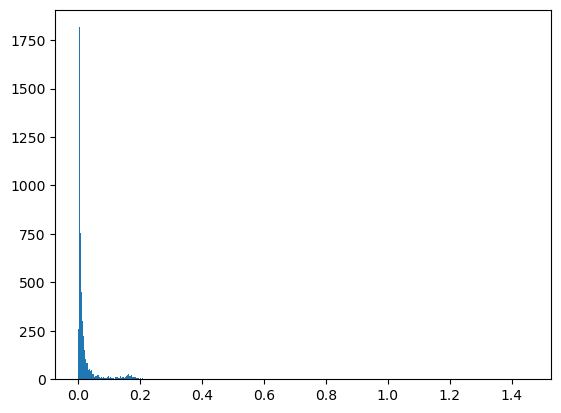

In [6]:
plt.hist(nx.degree_centrality(graph).values(),bins=1000)
plt.show()
plt.hist(nx.betweenness_centrality(graph).values(),bins=1000)
plt.show()
plt.hist(nx.pagerank_numpy(graph).values(),bins=1000)
plt.show()